#### Primera Rama: Carga y Visualización Inicial de Datos (Archivo Excel)

In [14]:
# Importar bibliotecas necesarias
import pandas as pd

# Paso 1: Cargar los datos desde un archivo Excel
# Ruta del archivo (reemplazar con la ruta real del archivo a analizar)
file_path = "data/Bank_Clients_v2.xlsx"

# Leer los datos en un DataFrame
try:
    data = pd.read_excel(file_path, index_col=0)
    print("Datos cargados exitosamente.")
except FileNotFoundError:
    raise Exception(f"El archivo en la ruta {file_path} no fue encontrado.")
except ValueError:
    raise Exception("Error al leer el archivo Excel. Verifica el formato del archivo.")

# Paso 2: Crear una tabla de datos
# Mostrar información básica del dataset para validación inicial
print("\nInformación general del dataset:")
print(data.info())

# Vista previa de las primeras filas de los datos
print("\nPrimeras filas del dataset:")
print(data.head())

# Validación de datos cargados (recuento de valores nulos y tipos de datos)
print("\nValidación inicial de los datos:")
print("Cantidad de valores nulos por columna:")
print(data.isnull().sum())


Datos cargados exitosamente.

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB
None

Primeras filas del dataset:
    Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
ID                                                                             
1    67    male    2     own             NaN           little           1169   
2    


Columnas numéricas seleccionadas:
Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

Matriz de correlación:
                    Age       Job  Credit amount  Duration
Age            1.000000  0.015673       0.032716 -0.036136
Job            0.015673  1.000000       0.285385  0.210910
Credit amount  0.032716  0.285385       1.000000  0.624984
Duration      -0.036136  0.210910       0.624984  1.000000


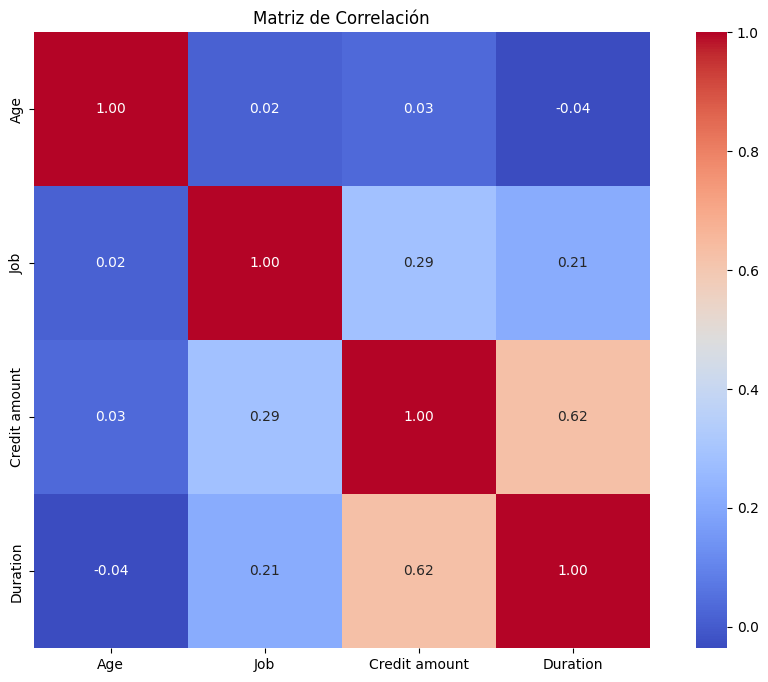

In [15]:
# Paso 3: Seleccionar únicamente las columnas numéricas
numerical_data = data.select_dtypes(include=['number'])

# Verificar las columnas numéricas seleccionadas
print("\nColumnas numéricas seleccionadas:")
print(numerical_data.columns)

# Calcular la matriz de correlación para las columnas numéricas
print("\nMatriz de correlación:")
correlation_matrix = numerical_data.corr()  # Calcular correlación solo para datos numéricos
print(correlation_matrix)

# Paso 4: Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de Correlación")
plt.show()


#### Análisis de Correlación Categórica-Numerical

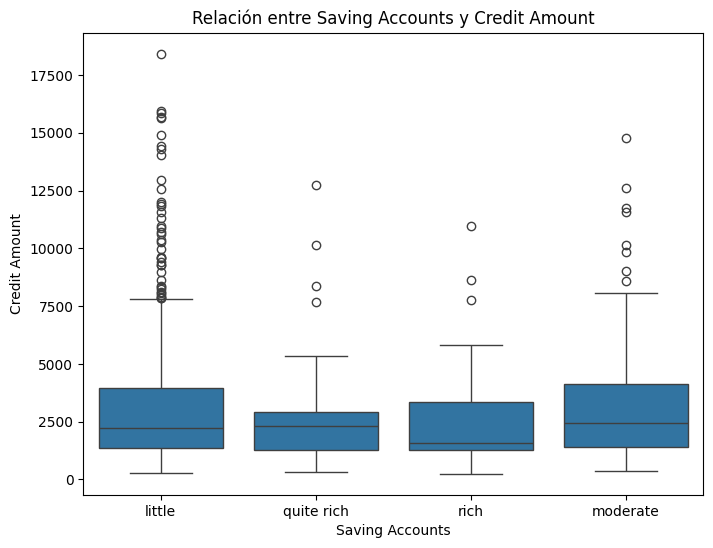

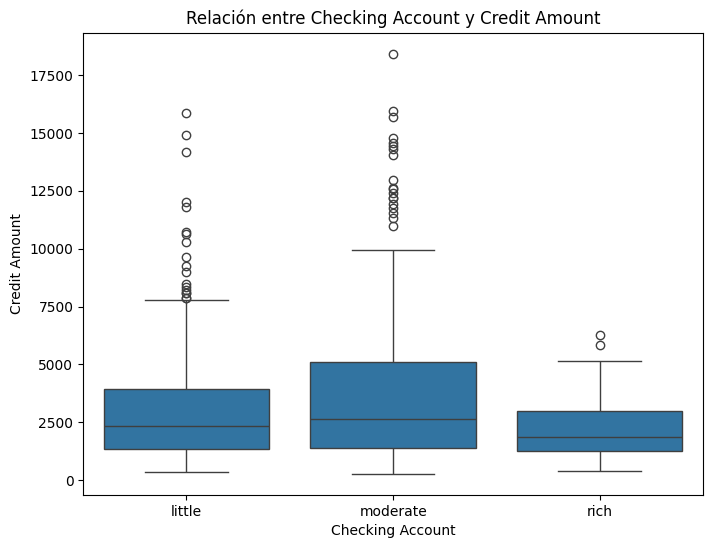

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar Saving accounts vs Credit amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Saving accounts'], y=data['Credit amount'])
plt.title('Relación entre Saving Accounts y Credit Amount')
plt.xlabel('Saving Accounts')
plt.ylabel('Credit Amount')
plt.show()

# Comparar Checking account vs Credit amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Checking account'], y=data['Credit amount'])
plt.title('Relación entre Checking Account y Credit Amount')
plt.xlabel('Checking Account')
plt.ylabel('Credit Amount')
plt.show()


#### Prueba Estadística (ANOVA o Kruskal-Wallis)

In [17]:
from scipy.stats import f_oneway

# ANOVA para Saving accounts vs Credit amount
anova_result_saving = f_oneway(
    *[data[data['Saving accounts'] == cat]['Credit amount'] for cat in data['Saving accounts'].dropna().unique()]
)
print("ANOVA (Saving Accounts vs Credit Amount):")
print(f"F-statistic: {anova_result_saving.statistic:.2f}, p-value: {anova_result_saving.pvalue:.4f}")

# ANOVA para Checking account vs Credit amount
anova_result_checking = f_oneway(
    *[data[data['Checking account'] == cat]['Credit amount'] for cat in data['Checking account'].dropna().unique()]
)
print("\nANOVA (Checking Account vs Credit Amount):")
print(f"F-statistic: {anova_result_checking.statistic:.2f}, p-value: {anova_result_checking.pvalue:.4f}")


ANOVA (Saving Accounts vs Credit Amount):
F-statistic: 1.93, p-value: 0.1226

ANOVA (Checking Account vs Credit Amount):
F-statistic: 9.01, p-value: 0.0001


#### Regresión Lineal o Logística

In [18]:
print("Tipos de datos en las columnas:")
print(data_encoded.dtypes)


Tipos de datos en las columnas:
Age                            int64
Sex                           object
Job                            int64
Housing                       object
Credit amount                  int64
Duration                       int64
Purpose                       object
Saving accounts_moderate        bool
Saving accounts_quite rich      bool
Saving accounts_rich            bool
Checking account_moderate       bool
Checking account_rich           bool
dtype: object


In [19]:
# Convertir variables categóricas a dummies
data_encoded = pd.get_dummies(data, columns=['Saving accounts', 'Checking account'], drop_first=True)


In [20]:
print("Columnas después de codificar las categóricas:")
print(data_encoded.columns)


Columnas después de codificar las categóricas:
Index(['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich'],
      dtype='object')


In [21]:
import statsmodels.api as sm

# Definir las variables independientes y dependiente
X = data_encoded.drop(['Credit amount'], axis=1)  # Variables independientes
y = data_encoded['Credit amount']  # Variable dependiente

# Convertir a tipo float si hay algún problema residual
X = X.astype(float)
y = y.astype(float)

# Agregar un intercepto a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


ValueError: could not convert string to float: 'male'

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Convertir Saving accounts y Checking account a variables dummy
data_encoded = pd.get_dummies(data, columns=['Saving accounts', 'Checking account'], drop_first=True)

# Definir variables dependiente e independientes
X = data_encoded.drop(['Credit amount'], axis=1)  # Variables independientes
y = data_encoded['Credit amount']                # Variable dependiente

# Agregar un intercepto
X = sm.add_constant(X)

# Ajustar modelo de regresión
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#### Visualización de Relación Conjunta

In [ ]:
# Visualizar Saving accounts, Checking account vs Credit amount
sns.scatterplot(x=data['Credit amount'], y=data['Saving accounts'], hue=data['Checking account'])
plt.title('Relación conjunta: Saving Accounts y Checking Account vs Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Saving Accounts')
plt.show()
